In [1]:
from velocity import get
from velocity.velocity_data import particle_type
from velocity.velocity_data import dm_mass
from velocity.velocity_data import find_circ_vel
from velocity.velocity_data import star_pos_vel
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [3]:
r,vel_circ = find_circ_vel()

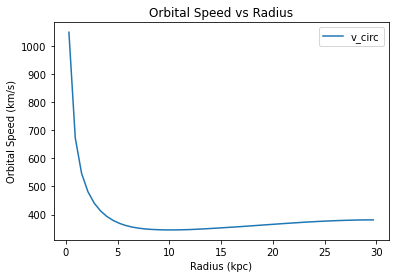

In [4]:
plt.plot(r,vel_circ, label = "v_circ")

plt.legend()

plt.xlabel("Radius (kpc)")
plt.ylabel("Orbital Speed (km/s)")
plt.title("Orbital Speed vs Radius")
plt.savefig("OrbitalVel_tot.png",dpi=200)

plt.show()

In [2]:
pos,vel,star_masses = star_pos_vel()

(1707327, 3)
(1707327, 3)


Galaxy Angular Momentum

In [5]:
J_tot = []
J_test = []
v = []

r_new = []

position = []

for i in range(len(dx)):
    pos_vec = [dx[i], dy[i], dz[i]]
    vel_vec = [vx[i], vy[i], vz[i]]
    pos = np.sqrt(np.dot(pos_vec,pos_vec))
    if pos <= 30:
        position.append(pos)
        result = star_masses[i]*(np.cross(pos_vec, vel_vec))
        v.append(vel_vec)
        J_tot.append(result)
        r_new.append(np.sqrt(dx[i]**2 + dy[i]**2 + dz[i]**2))
        J_test.append(np.sqrt(result[0]**2 + result[1]**2 + result[2]**2))


In [16]:
print((vx))


[-10.354553 -13.606918   9.217438 ... 305.1421   -68.53239   33.02496 ]


In [7]:
count = []

for point in position:
    if point <= 30:
        count.append(point)
        
print(len(position),
     len(v), len(J_test),max(count))

1619212 1619212 1619212 29.999925392691832


Vertical Unit Vector

In [8]:
J = sum(J_tot)

J_mag = np.sqrt(J[0]**2 + J[1]**2 + J[2]**2)
print(J)
n_j = J/J_mag

[4.93262445e+13 3.43852538e+13 1.09683601e+13]


2d Radius and Radial Unit Vector

In [9]:
r_2d_tot = []
n_r = []

for i in range(len(position)):
    pos_vec = [dx[i], dy[i], dz[i]]
    vel_vec = [vx[i], vy[i], vz[i]]
    r_2d = pos_vec - np.dot(pos_vec,n_j)
    
    r_2d_tot.append(result)
    
    r_2d_mag = np.sqrt(r_2d[0]**2 + r_2d[1]**2 + r_2d[2]**2)
    
    n_r.append(r_2d/r_2d_mag)


Rotational Unit Vector

In [10]:
n_phi = []

for i in range(len(position)):

    result = np.cross(n_j,n_r[i])
    
    n_phi.append(result)

Galaxy Reference Frame Velocities

In [11]:
v_phi_i = []
v_r_i = []
v_j_i = []
v_dotted_i = []
for i in range(len(position)):
    v_phi_i.append(np.dot(v[i],n_phi[i]))
    v_r_i.append(np.dot(v[i],n_r[i]))
    v_j_i.append(np.dot(v[i],n_j))
    v_dotted_i.append(np.dot(v[i],v[i]))

v_phi = np.array(v_phi_i)
v_r = np.array(v_r_i)
v_j = np.array(v_j_i)
v_dotted = np.array(v_dotted_i)

In [12]:
print(np.shape(v),
      np.shape(r_new),
      np.shape(v_phi),
      np.shape(v_dotted))

(1619212, 3) (1619212,) (1619212,) (1619212,)


In [13]:
v_final = v_dotted - v_r**2 - v_j**2

np.shape(J_mag)

()

Epsilon

316742.6560843138 [  320.82341339   617.78539619   836.2209049   1031.56170717
  1213.34101886  1390.03533946  1564.52655029  1739.9525714
  1918.19680491  2099.88232726  2285.92816327  2476.69850904
  2671.6977253   2871.37080891  3074.98196388  3281.18581148
  3491.20186563  3704.00146749  3920.74750973  4140.71551857
  4365.02274691  4592.90547798  4823.83041392  5057.51157576
  5293.85681431  5532.33648267  5771.97255801  6014.67556931
  6261.42863255  6509.40719998  6759.90275092  7013.20735532
  7266.8951921   7523.20476286  7781.08387111  8038.4016854
  8297.33597239  8558.5500721   8818.06637692  9076.05554873
  9333.40779777  9590.76483855  9846.0576489  10098.50532121
 10350.64473121 10600.63531003 10845.91484577 11086.13913335
 11321.14883234]


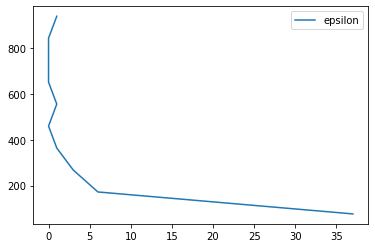

In [14]:
e_v = J_test[10]/(r*vel_circ)

print(J_test[10],(r*vel_circ))

e_v_final, y = np.histogram(e_v)

y_final = (y[1:]+y[:-1])/2


plt.plot(e_v_final, y_final, label = "epsilon")

plt.legend()

plt.show()

Radial Velocity

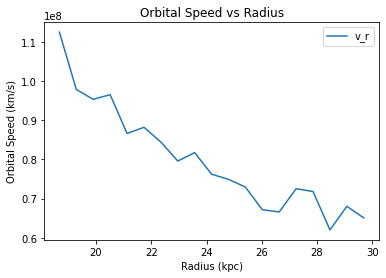

In [15]:
import requests
from scipy import stats
import h5py
import numpy as np
from velocity import get



vr,rr,num = stats.binned_statistic(r_new,v_final,statistic='sum',bins=np.linspace(0,30,50))
        
r_final = (rr[1:]+rr[:-1])/2
#plt.plot(r,vel_circ, label = "v_circ")
plt.plot(r_final[30:],vr[30:], label = "v_r")

plt.legend()

plt.xlabel("Radius (kpc)")
plt.ylabel("Orbital Speed (km/s)")
plt.title("Orbital Speed vs Radius")
#plt.savefig("OrbitalVel_tot.png",dpi=200)

plt.show()